Copyright 2020 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Gradient boosting: Problem solving


This session will use a dataset of video game sales for games that sold at least 100,000 copies.
Because the dataset is so large, only 1000 randomly sampled rows are included.

| Variable     | Type    | Description                                                                                 |
|:--------------|:---------|:---------------------------------------------------------------------------------------------|
| Rank         | Interval   | Ranking of overall sales                                                                    |
| Name         | Nominal   | The games name                                                                              |
| Platform     | Nominal   | Platform of the games release (i.e. PC,PS4, etc.)                                           |
| Year         | Ratio   | Year of the game's release                                                                  |
| Genre        | Nominal   | Genre of the game                                                                           |
| Publisher    | Nominal   | Publisher of the game                                                                       |
| NA_Sales     | Ratio   | Sales in North America (in millions)                                                        |
| EU_Sales     | Ratio   | Sales in Europe (in millions)                                                               |
| JP_Sales     | Ratio   | Sales in Japan (in millions)                                                                |
| Other_Sales  | Ratio   | Sales in the rest of the world (in millions)                                                |
| Global_Sales | Ratio   | Total worldwide sales.                                                                      |

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from <a href="https://www.kaggle.com/gregorut/videogamesales">Kaggle</a>.
</div>
<br>

The goal is to predict `Global_Sales` using the other non-sales variables in the data.


## Load data

Import `pandas` for dataframes.

In [3]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="importAs" id="G*NhDz5Jo?CcaJf3rUv}" x="150" y="308"><field name="libraryName">pandas</field><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field></block></xml>

Load the dataframe with `datasets/vgsales-1000.csv`, using `index_col="Name"`.

In [12]:
dataframe = pd.read_csv('datasets/vgsales-1000.csv',index_col="Name")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="FJGldw(qFp?V=E]uaN)4" x="21" y="86"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="VALUE"><block type="varDoMethod" id="4s18v%0iqE%_l@{fLYCo"><mutation items="2"></mutation><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="g-rn_ut-T:ibsHz}^S1V"><field name="TEXT">datasets/vgsales-1000.csv</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="]VY}sc?V2s+HOr5/6STR"><field name="CODE">index_col="Name"</field></block></value></block></value></block><block type="variables_get" id="M_e+$0PLM[{X,H?~umVp" x="112" y="287"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></xml>

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,,,
SCORE International Baja 1000: The Official Game,16598,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
Backyard Wrestling 2: There Goes the Neighborhood,9916,XB,2004.0,Fighting,Eidos Interactive,0.09,0.03,0.00,0.00,0.12
Cardfight!! Vanguard: Ride to Victory,11035,3DS,2013.0,Misc,FuRyu,0.00,0.00,0.09,0.00,0.09
Gold and Glory: The Road to El Dorado,12779,PS,2000.0,Adventure,Ubisoft,0.03,0.02,0.00,0.00,0.06
Miyako,15552,PSP,2010.0,Adventure,Idea Factory,0.00,0.00,0.02,0.00,0.02
...,...,...,...,...,...,...,...,...,...,...
Magicka,14704,PC,2011.0,Role-Playing,Paradox Interactive,0.00,0.02,0.00,0.01,0.03
Sega Ages 2500 Series Vol. 26: Dynamite Deka,15610,PS2,2006.0,Action,Sega,0.00,0.00,0.02,0.00,0.02
Pro Yakyuu Team o Tsukurou!,6986,DC,1999.0,Sports,Sega,0.00,0.00,0.23,0.00,0.23


## Explore data

### Describe and drop missing

Describe the data.

In [16]:
dataframe.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod" id="-[lX-}4sT`|#7E(Sti)^" x="78" y="266"><mutation items="1"></mutation><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data></block></xml>

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,1000.000000,986.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,8002.803000,2006.424949,0.303230,0.172770,0.100670,0.054710,0.631570
std,4762.947747,5.826854,0.873913,0.568278,0.390234,0.171543,1.807551
min,7.000000,1981.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,3890.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.070000
50%,7744.000000,2008.000000,0.080000,0.030000,0.000000,0.010000,0.190000
75%,12055.500000,2010.000000,0.250000,0.120000,0.040000,0.040000,0.512500
max,16598.000000,2016.000000,11.380000,9.230000,6.500000,2.900000,30.010000


-----------
**QUESTION:**

Does the min/mean/max of each variable make sense to you?

**ANSWER: (click here to edit)**

*They make sense. Some sales are zero, but that's probably OK - rounded down to zero.
Looks like the ranks are from the original dataset because they go above 1000.*

--------------------

Try to remove missing values to see if any rows are incomplete.

In [18]:
dataframe = dataframe.dropna()

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="variables_set" id="FJGldw(qFp?V=E]uaN)4" x="31" y="222"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="VALUE"><block type="varDoMethod" id="4s18v%0iqE%_l@{fLYCo"><mutation items="1"></mutation><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">dropna</field><data>dataframe:dropna</data></block></value></block><block type="variables_get" id="yN6MT1B[)Pk)cEECN_YZ" x="31" y="286"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></xml>

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,,,
SCORE International Baja 1000: The Official Game,16598,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
Backyard Wrestling 2: There Goes the Neighborhood,9916,XB,2004.0,Fighting,Eidos Interactive,0.09,0.03,0.00,0.00,0.12
Cardfight!! Vanguard: Ride to Victory,11035,3DS,2013.0,Misc,FuRyu,0.00,0.00,0.09,0.00,0.09
Gold and Glory: The Road to El Dorado,12779,PS,2000.0,Adventure,Ubisoft,0.03,0.02,0.00,0.00,0.06
Miyako,15552,PSP,2010.0,Adventure,Idea Factory,0.00,0.00,0.02,0.00,0.02
...,...,...,...,...,...,...,...,...,...,...
Magicka,14704,PC,2011.0,Role-Playing,Paradox Interactive,0.00,0.02,0.00,0.01,0.03
Sega Ages 2500 Series Vol. 26: Dynamite Deka,15610,PS2,2006.0,Action,Sega,0.00,0.00,0.02,0.00,0.02
Pro Yakyuu Team o Tsukurou!,6986,DC,1999.0,Sports,Sega,0.00,0.00,0.23,0.00,0.23


-----------
**QUESTION:**

How many rows had missing values?

**ANSWER: (click here to edit)**

*Because we started with 1000 and now have 986, 14.*

--------------------

### Visualize

Import `plotly.express`.

In [21]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="importAs" id="JKd}DIrGfV*IelKZ!4ls" x="129" y="219"><field name="libraryName">plotly.express</field><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field></block></xml>

And create a correlation matrix heatmap.

In [32]:
corr = dataframe.corr(numeric_only=True)

corr

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="vYNmRXjfooN{J0xidPv?">corr</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="variables_set" id="o+E~S1:y.,f_naE+oOHM" x="97" y="202"><field name="VAR" id="vYNmRXjfooN{J0xidPv?">corr</field><value name="VALUE"><block type="varDoMethod" id="TGCJO#CXd^qt:[Y0Vx;s"><mutation items="1"></mutation><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">corr</field><data>dataframe:corr</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="l}[^|rr924;wMrwvb{w@"><field name="CODE">numeric_only=True</field></block></value></block></value></block><block type="variables_get" id="t;Dp?Cue9+YhMy.eGRr-" x="133" y="293"><field name="VAR" id="vYNmRXjfooN{J0xidPv?">corr</field></block></xml>

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.196178,-0.432582,-0.394575,-0.298198,-0.408929,-0.435952
Year,0.196178,1.000000,-0.098756,0.010864,-0.248002,0.064498,-0.091873
NA_Sales,-0.432582,-0.098756,1.000000,0.851992,0.615006,0.769633,0.956802
EU_Sales,-0.394575,0.010864,0.851992,1.000000,0.595793,0.904918,0.940436
JP_Sales,-0.298198,-0.248002,0.615006,0.595793,1.000000,0.479107,0.745783
Other_Sales,-0.408929,0.064498,0.769633,0.904918,0.479107,1.000000,0.854559
Global_Sales,-0.435952,-0.091873,0.956802,0.940436,0.745783,0.854559,1.000000


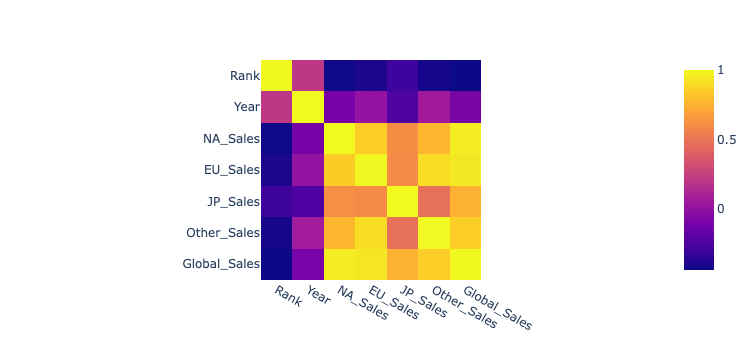

In [56]:
px.imshow(corr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="vYNmRXjfooN{J0xidPv?">corr</variable></variables><block type="varDoMethod" id="7PkTI5@+A6#C}J7CTmyF" x="0" y="0"><mutation items="1"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">imshow</field><data>px:imshow</data><value name="ADD0"><block type="variables_get" id="(,/:%(!_VFReuE;yM!]f"><field name="VAR" id="vYNmRXjfooN{J0xidPv?">corr</field></block></value></block></xml>

-----------
**QUESTION:**

What's going on with `Rank` and the `*_Sales` variables?

**ANSWER: (click here to edit)**

*Rank appears to be negatively correlated with most things. 
That makes sense because a rank of 1 would have high sales, and a rank of 1000 would have lower sales.
All of the sales seem highly correlated with each other. 
Europe might be doing it's own thing to a small extent.
Basically, we need to remove all other sales data to make a valid model for `Global_Sales`, otherwise we are predicting sales by itself.*

--------------------

Do a scatterplot matrix to see the relationships between these variables.

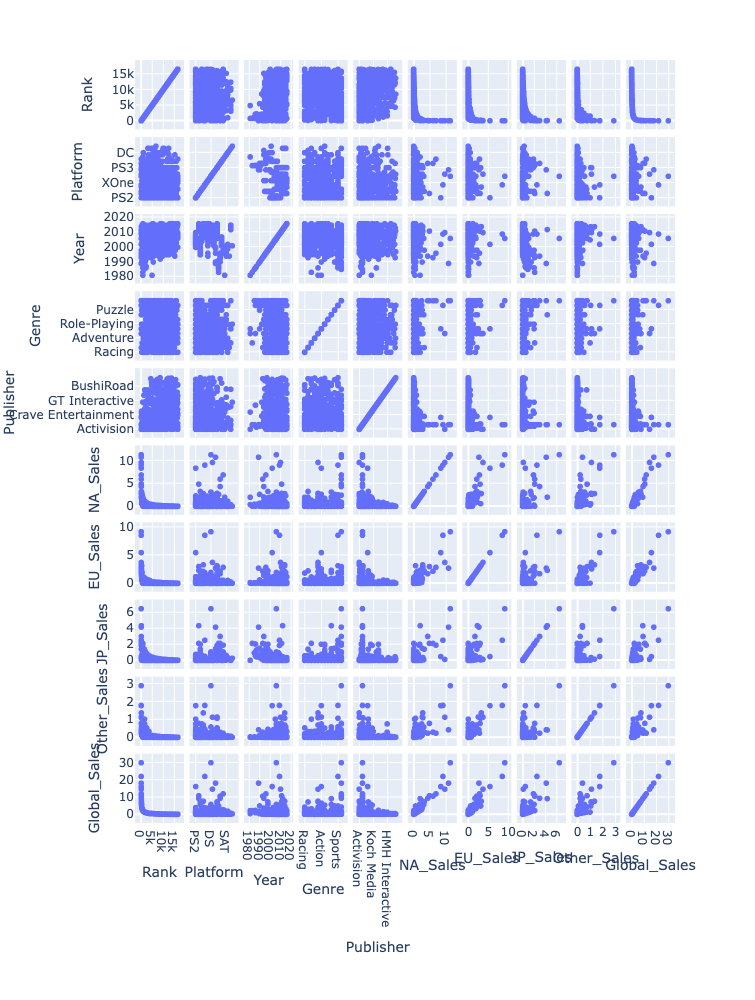

In [70]:
px.scatter_matrix(dataframe,height=1000,width=1000)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod" id="K_Y0K-1=:jF)7/~qEX=/" x="0" y="0"><mutation items="3"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">scatter_matrix</field><data>px:scatter_matrix</data><value name="ADD0"><block type="variables_get" id="+GSpF6qGd0u~!{IovDiD"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="u?nF]o2n}~oDkd6YQ01@"><field name="CODE">height=1000</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="RnZYh3Sg!kaAC:.-X]:A"><field name="CODE">width=1000</field></block></value></block></xml>

-----------
**QUESTION:**

Take a look at the scatterplots of the nominal variables against the `Global_Sales`. 
Is there any obvious pattern?

**ANSWER: (click here to edit)**

*Only that sales seem to be increasing over time. 
Also, it looks like some publishers sell more than others, which is obvious*

--------------------

Make a histogram of `Global_Sales` so we can see how it is distributed.

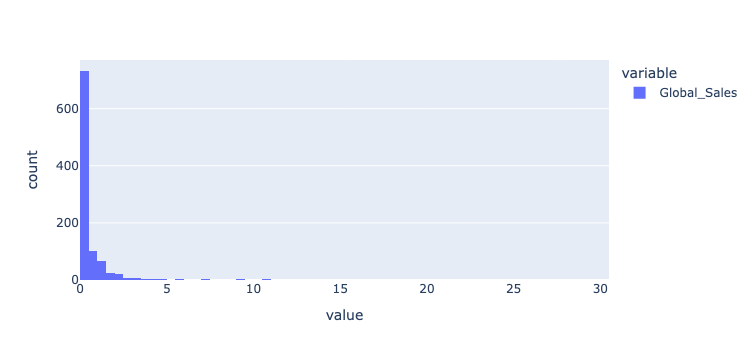

In [76]:
px.histogram(dataframe['Global_Sales'])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod" id="f`W@,!`/{w:Mj8xg1c]%" x="0" y="0"><mutation items="1"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="indexer" id=")@w$02j3V1;Fy9=[pwV!"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="INDEX"><block type="text" id="$jm#6O}@!r0U!T0EZ`j#"><field name="TEXT">Global_Sales</field></block></value></block></value></block></xml>

------------------
**QUESTION:**

Do you think we need to transform `Global_Sales` to make it more normal? Why or why not?

**ANSWER: (click here to edit)**

*Yes, definitely. 
It is very strongly skewed - nowhere near normal. If we leave as is, the residuals for a few data points will more strongly affect later boosted models, which is probably not what we want.*

-------------------

## Prepare train/test sets

### X, Y, and dummies

Make a new dataframe called `X` by either dropping all the sales related variables or creating a dataframe with just the columns you want to keep.

In [188]:
X = dataframe.drop(columns=['Rank', 'NA_Sales',        'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])

X

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="variables_set" id="M9g^9:hbZQ0Cb9jKq9V6" x="0" y="0"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="varDoMethod" id="k7t38%eJz)@=B8{vW^(u"><mutation items="1"></mutation><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">drop</field><data>dataframe:drop</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="Lvk#qV@/)@N7k41fREul"><field name="CODE">columns=['Rank', 'NA_Sales',        'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']</field></block></value></block></value></block><block type="variables_get" id="n7^Z.yA4sZ4]FyeSZr-2" x="72" y="91"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></xml>

,Platform,Year,Genre,Publisher
Name,,,,
SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision
Backyard Wrestling 2: There Goes the Neighborhood,XB,2004.0,Fighting,Eidos Interactive
Cardfight!! Vanguard: Ride to Victory,3DS,2013.0,Misc,FuRyu
Gold and Glory: The Road to El Dorado,PS,2000.0,Adventure,Ubisoft
Miyako,PSP,2010.0,Adventure,Idea Factory
...,...,...,...,...
Magicka,PC,2011.0,Role-Playing,Paradox Interactive
Sega Ages 2500 Series Vol. 26: Dynamite Deka,PS2,2006.0,Action,Sega
Pro Yakyuu Team o Tsukurou!,DC,1999.0,Sports,Sega


Import `numpy` to square root transform `Y`.

In [190]:
import numpy as np

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="hxqH|@PJU~wrI]t*tHgd">np</variable></variables><block type="importAs" id="yX*/Q9Ag+}3KvnB:p+X+" x="69" y="125"><field name="libraryName">numpy</field><field name="VAR" id="hxqH|@PJU~wrI]t*tHgd">np</field></block></xml>

Save a dataframe with just `Global_Sales` in `Y`, but use `numpy` to log transform in a freestyle block: `np.sqrt(dataframe[[ "Global_Sales"]])`.

In [192]:
Y = np.sqrt(dataframe[[ "Global_Sales"]])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="variables_set" id="wY};U^8vj`~HV$Gd`Ai:" x="27" y="225"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field><value name="VALUE"><block type="dummyOutputCodeBlock" id="OgChZ{lc/PpO0;NW_C`{"><field name="CODE">np.sqrt(dataframe[[ "Global_Sales"]])</field></block></value></block></xml>

Replace the nominal variables with dummies and save in `X`.

In [194]:
X = pd.get_dummies(X)

X

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="N[``Tj{Y-X9-:{:,LZie" x="0" y="0"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="varDoMethod" id="!snzGlMsbL.%p)$iCu~-"><mutation items="1"></mutation><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">get_dummies</field><data>pd:get_dummies</data><value name="ADD0"><block type="variables_get" id="tg8`dNH`a{(/lf~~*ow_"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value></block></value></block><block type="variables_get" id="K6D-IN?9%-C%m=Q%hM%O" x="136" y="82"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></xml>

,Year,Platform_2600,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_N64,Platform_NES,...,Publisher_Vic Tokai,Publisher_Virgin Interactive,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_Yacht Club Games,Publisher_Yeti,Publisher_Yuke's,Publisher_Yumedia,Publisher_Zoo Digital Publishing,Publisher_Zoo Games
Name,,,,,,,,,,,,,,,,,,,,,
SCORE International Baja 1000: The Official Game,2008.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Backyard Wrestling 2: There Goes the Neighborhood,2004.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cardfight!! Vanguard: Ride to Victory,2013.0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Gold and Glory: The Road to El Dorado,2000.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Miyako,2010.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Magicka,2011.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sega Ages 2500 Series Vol. 26: Dynamite Deka,2006.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Pro Yakyuu Team o Tsukurou!,1999.0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Train/test splits

Import `sklearn.model_selection`.

In [196]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable></variables><block type="importAs" id="E{QJ$O@lc8u.;OTWdVgf" x="-89" y="168"><field name="libraryName">sklearn.model_selection</field><field name="VAR" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field></block></xml>

Create the data splits. 
Make sure to use `random_state=1` so we get the same answers.
Don't bother stratifying.

In [198]:
splits = model_selection.train_test_split(X,Y,random_state=1)

splits

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="variables_set" id="HpD!.HSC`PPRg]21i*7c" x="0" y="0"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field><value name="VALUE"><block type="varDoMethod" id="fUetl3$Ak=SI~T6T5!6c"><mutation items="3"></mutation><field name="VAR" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="ADD0"><block type="variables_get" id="Y.]:Pq~i`kp=i=n66IP["><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value><value name="ADD1"><block type="variables_get" id="?I^{*Ym$ebt7A+]PqJBE"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="rUYUxZ8*EPBpig,6T%Ey"><field name="CODE"> random_state=1</field></block></value></block></value></block><block type="variables_get" id="`avIXGA@HvX^Y]7y}U^x" x="13" y="140"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></xml>

[                                                      Year  Platform_2600  \
 Name                                                                        
 LEGO Indiana Jones: The Original Adventures         2008.0          False   
 Mr Bean's Wacky World of Wii                        2009.0          False   
 MLB Inside Pitch 2003                               2003.0          False   
 FIFA Soccer 10                                      2009.0          False   
 Epic Mickey 2: The Power of Two                     2012.0          False   
 ...                                                    ...            ...   
 Wu-Tang: Shaolin Style                              1998.0          False   
 Daito Giken Koushiki Pachi-Slot Simulator: 24 -...  2008.0          False   
 Ninja Assault                                       2002.0          False   
 We Cheer                                            2008.0          False   
 Thor: God of Thunder                                2011.0     

## Fit model

Since the response/target variable is numeric, we need to use a gradient boosting regressor rather than a classifier.

Import `sklearn.ensemble`.

In [200]:
import sklearn.ensemble as ensemble

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="YrOLY99XD^WJhuTK)IFx">ensemble</variable></variables><block type="importAs" id="aH_~S~W~@4D,8tXvn_s6" x="69" y="99"><field name="libraryName">sklearn.ensemble</field><field name="VAR" id="YrOLY99XD^WJhuTK)IFx">ensemble</field></block></xml>

Create the gradient boosting regressor, using `random_state=1` and `subsample=.5`.

In [202]:
gradientBoostingRegressor = ensemble.GradientBoostingRegressor(random_state=1,subsample=.5)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</variable><variable id="YrOLY99XD^WJhuTK)IFx">ensemble</variable></variables><block type="variables_set" id="Fyby#Z6`$J{8yxJ#gF-6" x="-60" y="-2"><field name="VAR" id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</field><value name="VALUE"><block type="varCreateObject" id="r3OQ@H/8b[IQZMW^g~*k"><mutation items="2"></mutation><field name="VAR" id="YrOLY99XD^WJhuTK)IFx">ensemble</field><field name="MEMBER">GradientBoostingRegressor</field><data>ensemble:GradientBoostingRegressor</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="[-mu}yQud^_`?Lo{w#T5"><field name="CODE">random_state=1</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="/AF_8-cQdSwJT,pf=#:["><field name="CODE">subsample=.5</field></block></value></block></value></block></xml>

`fit` the classifier.

In [204]:
gradientBoostingRegressor.fit(splits[0],splits[2])

gradientBoostingRegressor.score(splits[0],splits[2])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="varDoMethod" id="-@fm,911cJiCu@jkys%R" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</field><field name="MEMBER">fit</field><data>gradientBoostingRegressor:fit</data><value name="ADD0"><block type="lists_getIndex" id="GHd.LHRra`z~kx0vVdTJ"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="b[/|~M/6D^+[c(x7dSj]"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="wYBt^vv!H$Ekd])VDjs4"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="~wEL{-P14Q43pm[cVNuD"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="Hl3EbxipNaFWweOlPk`k"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="xF~S-)]5J-ZS/W{dOCIW"><field name="NUM">3</field></block></value></block></value></block><block type="varDoMethod" id="CjU]N!NxuucGUaLq5F0v" x="11" y="217"><mutation items="2"></mutation><field name="VAR" id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</field><field name="MEMBER">score</field><data>gradientBoostingRegressor:score</data><value name="ADD0"><block type="lists_getIndex" id="L{kD2F7ueMF-Ox;R_1w/"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="MQsqxYx3@KD7g+I7[VbG"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="CGk.Wl:v[H,DdW.WKe)0"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="=t6CI+COyw8b9G=W]5DX"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="B~ry~P@(1j?3$xQ2QNeC"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="vsk~#8A@qs`@CfTaI`g("><field name="NUM">3</field></block></value></block></value></block></xml>

/opt/tljh/user/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.6265236622548307

Get  and save predictions.

In [206]:
predictionsGradientBoostingRegressor = gradientBoostingRegressor.predict(splits[1])

predictionsGradientBoostingRegressor

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="eK*]6c^C8Yxr#Q.djnd9">predictionsGradientBoostingRegressor</variable><variable id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="variables_set" id="FM4[*FDWeN(7%iHSAfQ?" x="-63" y="0"><field name="VAR" id="eK*]6c^C8Yxr#Q.djnd9">predictionsGradientBoostingRegressor</field><value name="VALUE"><block type="varDoMethod" id="iyb},eS,^AG]P+e8|?_w"><mutation items="1"></mutation><field name="VAR" id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</field><field name="MEMBER">predict</field><data>gradientBoostingRegressor:predict</data><value name="ADD0"><block type="lists_getIndex" id="R*Or)Lt*4`H3i4_~7uxv"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="mfXnt}9PKY`mQa-ArY^l"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="g3yD|84!^X=kAXZVaE?Q"><field name="NUM">2</field></block></value></block></value></block></value></block><block type="variables_get" id="SW$%{+G?rAW+/k[K+?x." x="266" y="222"><field name="VAR" id="eK*]6c^C8Yxr#Q.djnd9">predictionsGradientBoostingRegressor</field></block></xml>

array([ 1.32092819,  0.21306055,  0.20927416,  0.46917042,  0.49778596,
        0.55848739,  0.70568992,  1.8888822 ,  0.5416649 ,  0.46286648,
        0.25919751,  0.48988816,  0.54645546,  0.36042253,  0.45563133,
        0.26817849,  0.45470496,  0.35016616,  0.26417638,  0.82424811,
        0.62269255,  0.37005704,  0.91963045,  0.58690438,  0.26417638,
        0.21836429,  0.54508261,  0.49778596,  0.46310536,  0.44545042,
        0.38814673,  0.56168514,  0.83755805,  0.20927416,  0.6019127 ,
        0.44788694,  0.52923374,  0.34240454,  0.42784992,  0.70285128,
        0.79093259,  0.68398774,  0.56197914,  0.68092856,  0.46479275,
        0.50240512,  0.6479825 ,  0.5526948 ,  0.42795991,  0.96032557,
        0.47204859,  0.52207213,  0.38862783,  0.53094873,  0.40167547,
        0.60183473,  0.83350303,  0.50032977,  0.37403653,  0.3133764 ,
        0.69226945,  0.36042253,  0.3346299 ,  0.43021476,  0.50454406,
        0.83442844,  0.42003946,  0.56540301,  0.45444809,  0.76

## Evaluate the model

Because this is regression not classification, you can't use classification metrics like accuracy, precision, recall, and f1.
Instead, you'll use $r^2$.
Some examples are in the `Regression-trees-PS` notebook.

- Get the $r^2$ on the *training* set

- Get the $r^2$ on the *testing* set

In [208]:
print('Training r2:' + str(gradientBoostingRegressor.score(splits[0],splits[2])))
print('Training r2:' + str(gradientBoostingRegressor.score(splits[1],splits[3])))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="~IM}M:,`?~tIB8VB1m^X" x="39" y="16"><value name="TEXT"><block type="text_join" id="SP${6|~=}gsMxiy4{Nq6"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="A9Io`Zzs7V]5]Q{u_YJb"><field name="TEXT">Training r2:</field></block></value><value name="ADD1"><block type="varDoMethod" id="%!VjUHB:+Srn(8bKuAIJ"><mutation items="2"></mutation><field name="VAR" id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</field><field name="MEMBER">score</field><data>gradientBoostingRegressor:score</data><value name="ADD0"><block type="lists_getIndex" id="~?$vH`iAVcJGl/Yh@#EF"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="((j44.pu,vycN4$axJ6V"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="3XY*:yP.K;9pIkx[=A%9"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="*eWSG2k}!i]t,z4K].FL"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="}qD9@9H4ujWt9OS0XeWG"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="{KGidH1E:a7TR8@9rL8["><field name="NUM">3</field></block></value></block></value></block></value></block></value><next><block type="text_print" id=":fft}yl/KD%)D`Nap6~F"><value name="TEXT"><block type="text_join" id="A`Y=kn(R=mMLB8.[ozmM"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="k1nvNDy?InddqWap;RTB"><field name="TEXT">Training r2:</field></block></value><value name="ADD1"><block type="varDoMethod" id="@|%:s,w){YvhT2RvKQ:F"><mutation items="2"></mutation><field name="VAR" id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</field><field name="MEMBER">score</field><data>gradientBoostingRegressor:score</data><value name="ADD0"><block type="lists_getIndex" id="eD5z+a?icX==f}K=;Du5"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="LM4L0$Xbijh$J[k=N^:?"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="?v+^{.R~Rd,G/wt:H5Eo"><field name="NUM">2</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="m;FMO=W{Xck/nd.$@GHB"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="^!`$Au,a8!DSK+kS2#r_"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="QPNNfR+}1Z[#1Pn0xLS9"><field name="NUM">4</field></block></value></block></value></block></value></block></value></block></next></block></xml>

Training r2:0.6265236622548307
Training r2:-0.08372464930141921


------------------
**QUESTION:**

Compare the *training data performance* to the *testing data performance*. Which is better?
What do these differences tell you?

**ANSWER: (click here to edit)**

*The training data performance is OK, not amazing, and the test data performance is absolutely terrible.
This suggests that perhaps the model is overfit.*

-------------------

## Visualizing

### Feature importance

Visualize feature importance using a bar chart.

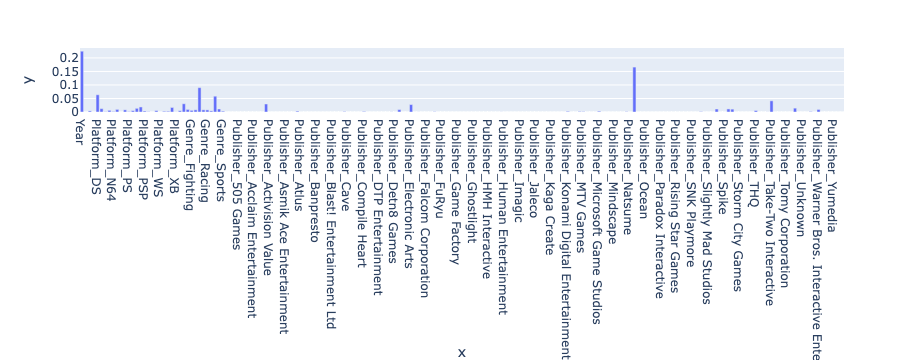

In [210]:
px.bar(x= (X.columns),y= (gradientBoostingRegressor.feature_importances_))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</variable></variables><block type="varDoMethod" id="!z5]f`%X4n*T=0{-(aa(" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">bar</field><data>px:bar</data><value name="ADD0"><block type="valueOutputCodeBlock" id="qZI8D,!{^(#A/}yvX;gL"><field name="CODE">x=</field><value name="INPUT"><block type="varGetProperty" id="W,,eI$$V-fSOVd#d/W/@"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><field name="MEMBER">columns</field><data>X:columns</data></block></value></block></value><value name="ADD1"><block type="valueOutputCodeBlock" id="*O`y7G*~0{)eacFs?#xe"><field name="CODE">y=</field><value name="INPUT"><block type="varGetProperty" id="-5}qa2uvIN{*o^Eqz;`~"><field name="VAR" id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</field><field name="MEMBER">feature_importances_</field><data>gradientBoostingRegressor:feature_importances_</data></block></value></block></value></block></xml>

------------------
**QUESTION:**

Hover over the bars to see the corresponding predictor and value. 
What are the most important features?

**ANSWER: (click here to edit)**

*`Year` and `Nintendo` are the most important by far.
`Platform` and `Shooter` games are important, and other publishers `Activision`, `Electronic Arts`, and `Take Two Interactive` are also important.*

-------------------

### Overfit

Use the OOB error to test if the model is overfit.

Import `plotly.graph_objects`

In [213]:
import plotly.graph_objects as go

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/S5EHzNl)/I50f/-KSZQ">go</variable></variables><block type="importAs" id="WV{jUj%W/=n1;iRGdHoh" x="21" y="-12"><field name="libraryName">plotly.graph_objects</field><field name="VAR" id="/S5EHzNl)/I50f/-KSZQ">go</field></block></xml>

Create an empty figure to draw lines on.

In [215]:
fig = go.Figure()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="FuH.yx^v|kVlL!174TwM">fig</variable><variable id="/S5EHzNl)/I50f/-KSZQ">go</variable></variables><block type="variables_set" id="/0h?*zn[*5v^D?X%MQok" x="75" y="137"><field name="VAR" id="FuH.yx^v|kVlL!174TwM">fig</field><value name="VALUE"><block type="varCreateObject" id="ccYq?D6[iomaxyAzJK/^"><mutation items="1"></mutation><field name="VAR" id="/S5EHzNl)/I50f/-KSZQ">go</field><field name="MEMBER">Figure</field><data>go:Figure</data></block></value></block></xml>

And add the two lines, one for training deviance and one for testing deviance.

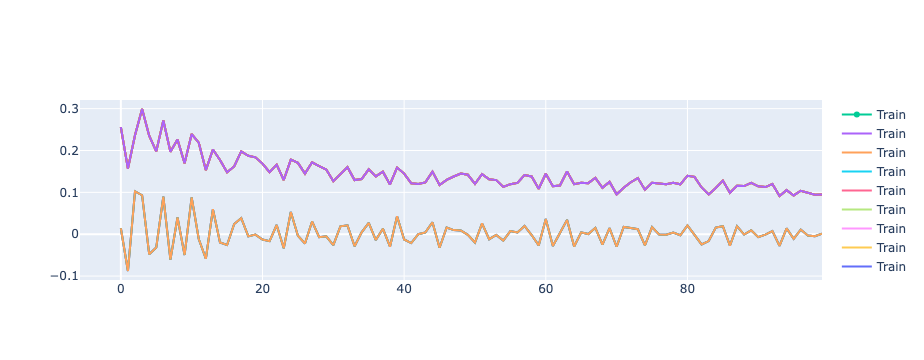

In [253]:
fig.add_scatter(x= (np.arange(0,100)),y= (gradientBoostingRegressor.train_score_),name= 'Train')

fig.add_scatter(x= (np.arange(0,100)),y= (gradientBoostingRegressor.oob_improvement_),name= 'Test')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="FuH.yx^v|kVlL!174TwM">fig</variable><variable id="hxqH|@PJU~wrI]t*tHgd">np</variable><variable id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</variable></variables><block type="varDoMethod" id="t+LX0/GT`Qh5{V)D|_Do" x="0" y="0"><mutation items="3"></mutation><field name="VAR" id="FuH.yx^v|kVlL!174TwM">fig</field><field name="MEMBER">add_scatter</field><data>fig:add_scatter</data><value name="ADD0"><block type="valueOutputCodeBlock" id="SFKiC7vZbj_T$?lR7Uvr"><field name="CODE">x=</field><value name="INPUT"><block type="varDoMethod" id="}[!RE~M`31lfT3iXKho5"><mutation items="2"></mutation><field name="VAR" id="hxqH|@PJU~wrI]t*tHgd">np</field><field name="MEMBER">arange</field><data>np:arange</data><value name="ADD0"><block type="math_number" id="|vG]HoJfzgS9~i]T1U=v"><field name="NUM">0</field></block></value><value name="ADD1"><block type="math_number" id="}DYOg1+kncvy5KPhq:KN"><field name="NUM">100</field></block></value></block></value></block></value><value name="ADD1"><block type="valueOutputCodeBlock" id="^@dHwrr.!k|eaV}-Ie`?"><field name="CODE">y=</field><value name="INPUT"><block type="varGetProperty" id="n4$I#aio8h|}Q7KAk~r1"><field name="VAR" id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</field><field name="MEMBER">train_score_</field><data>gradientBoostingRegressor:train_score_</data></block></value></block></value><value name="ADD2"><block type="valueOutputCodeBlock" id="v!H6Y=TQ3ex,{LJe[~om"><field name="CODE">name=</field><value name="INPUT"><block type="text" id="BO+*oyu$L_WDS25[fPH0"><field name="TEXT">Train</field></block></value></block></value></block><block type="varDoMethod" id="QoRkCw(aoCn+M(nqYeqi" x="11" y="181"><mutation items="3"></mutation><field name="VAR" id="FuH.yx^v|kVlL!174TwM">fig</field><field name="MEMBER">add_scatter</field><data>fig:add_scatter</data><value name="ADD0"><block type="valueOutputCodeBlock" id="==.xkO5pJ7$=R}+vaaIq"><field name="CODE">x=</field><value name="INPUT"><block type="varDoMethod" id="`+MV{t(D~KA/VuaQyj;["><mutation items="2"></mutation><field name="VAR" id="hxqH|@PJU~wrI]t*tHgd">np</field><field name="MEMBER">arange</field><data>np:arange</data><value name="ADD0"><block type="math_number" id="/fXCa-BE9STZL:zHL[D/"><field name="NUM">0</field></block></value><value name="ADD1"><block type="math_number" id="SbOuG:Zp4%Q:;KdL?Q-N"><field name="NUM">100</field></block></value></block></value></block></value><value name="ADD1"><block type="valueOutputCodeBlock" id="y9KLbLK,;K4!]2a.]qTv"><field name="CODE">y=</field><value name="INPUT"><block type="varGetProperty" id="#A7.n33JoZ!_FOt/oq=%"><field name="VAR" id="p^Wp_Xg_ruIuNDDvQNii">gradientBoostingRegressor</field><field name="MEMBER">oob_improvement_</field><data>gradientBoostingRegressor:oob_improvement_</data></block></value></block></value><value name="ADD2"><block type="valueOutputCodeBlock" id="S%4EB8ZL6s.u%W%51:kK"><field name="CODE">name=</field><value name="INPUT"><block type="text" id="r)%zR#If;iK@m8s_W.^S"><field name="TEXT">Test</field></block></value></block></value></block></xml>

------------------
**QUESTION:**

Do you think it would help our test data performance if we stopped training earlier? Why?

**ANSWER: (click here to edit)**

*Possibly around 4 or 5, thought test data performance seems bad all the way around.*

-------------------

**QUESTION:**

Now that you are familiar with this data and how gradient boosting performed with it, what other models would you try?